# Más desarrollos de modelos, empleando más funcionalidades de Scikit-Learn
> Dataset disponible en https://www.kaggle.com/datasets/ziya07/college-student-management-dataset

Este dataset incluye múltiples características relacionadas con el rendimiento estudiantil, métricas de uso de plataformas de aprendizaje, donde la variable objetivo es el riesgo de abandono. Comencemos con la acción.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("college_student_management_data.csv")
df.head()

,student_id,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,S001,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,0.70,8,0.74,High
1,S002,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,0.91,13,0.85,Medium
2,S003,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,0.58,18,0.99,Medium
3,S004,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,0.91,6,0.72,Medium
4,S005,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,0.77,15,0.76,High


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    1545 non-null   object 
 1   age                           1545 non-null   int64  
 2   gender                        1545 non-null   object 
 3   major                         1545 non-null   object 
 4   GPA                           1545 non-null   float64
 5   course_load                   1545 non-null   int64  
 6   avg_course_grade              1545 non-null   float64
 7   attendance_rate               1545 non-null   float64
 8   enrollment_status             1545 non-null   object 
 9   lms_logins_past_month         1545 non-null   int64  
 10  avg_session_duration_minutes  1545 non-null   int64  
 11  assignment_submission_rate    1545 non-null   float64
 12  forum_participation_count     1545 non-null   int64  
 13  vid

# EDA

Las variables están completas, por lo que no se requiere de imputación por valores faltantes. A continuación, se visualizará la distribución de las variables.

In [3]:
df.drop(columns=['student_id'], inplace=True)

In [4]:
numerical_columns = df.select_dtypes("number").columns
numerical_columns

Index(['age', 'GPA', 'course_load', 'avg_course_grade', 'attendance_rate',
       'lms_logins_past_month', 'avg_session_duration_minutes',
       'assignment_submission_rate', 'forum_participation_count',
       'video_completion_rate'],
      dtype='object')

In [5]:
categorical_columns = df.select_dtypes("object").columns
categorical_columns

Index(['gender', 'major', 'enrollment_status', 'risk_level'], dtype='object')

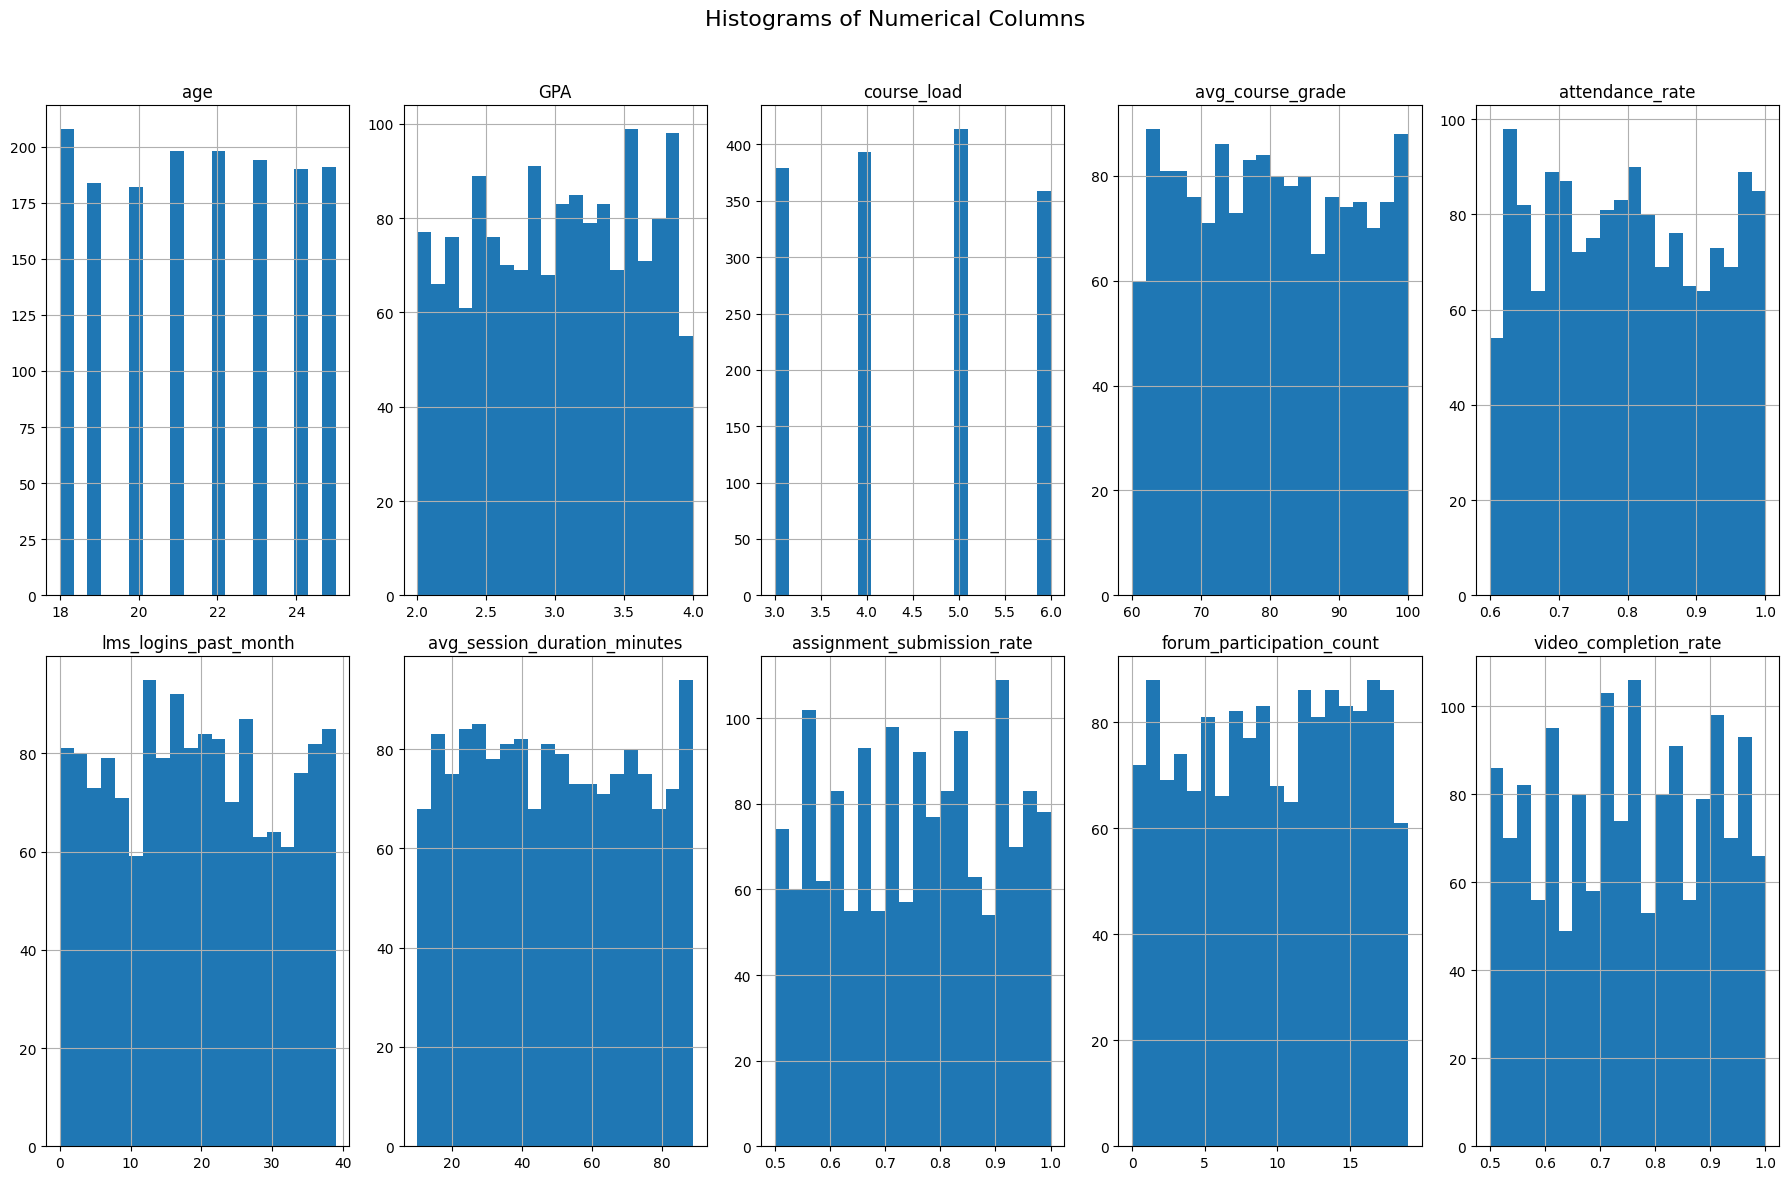

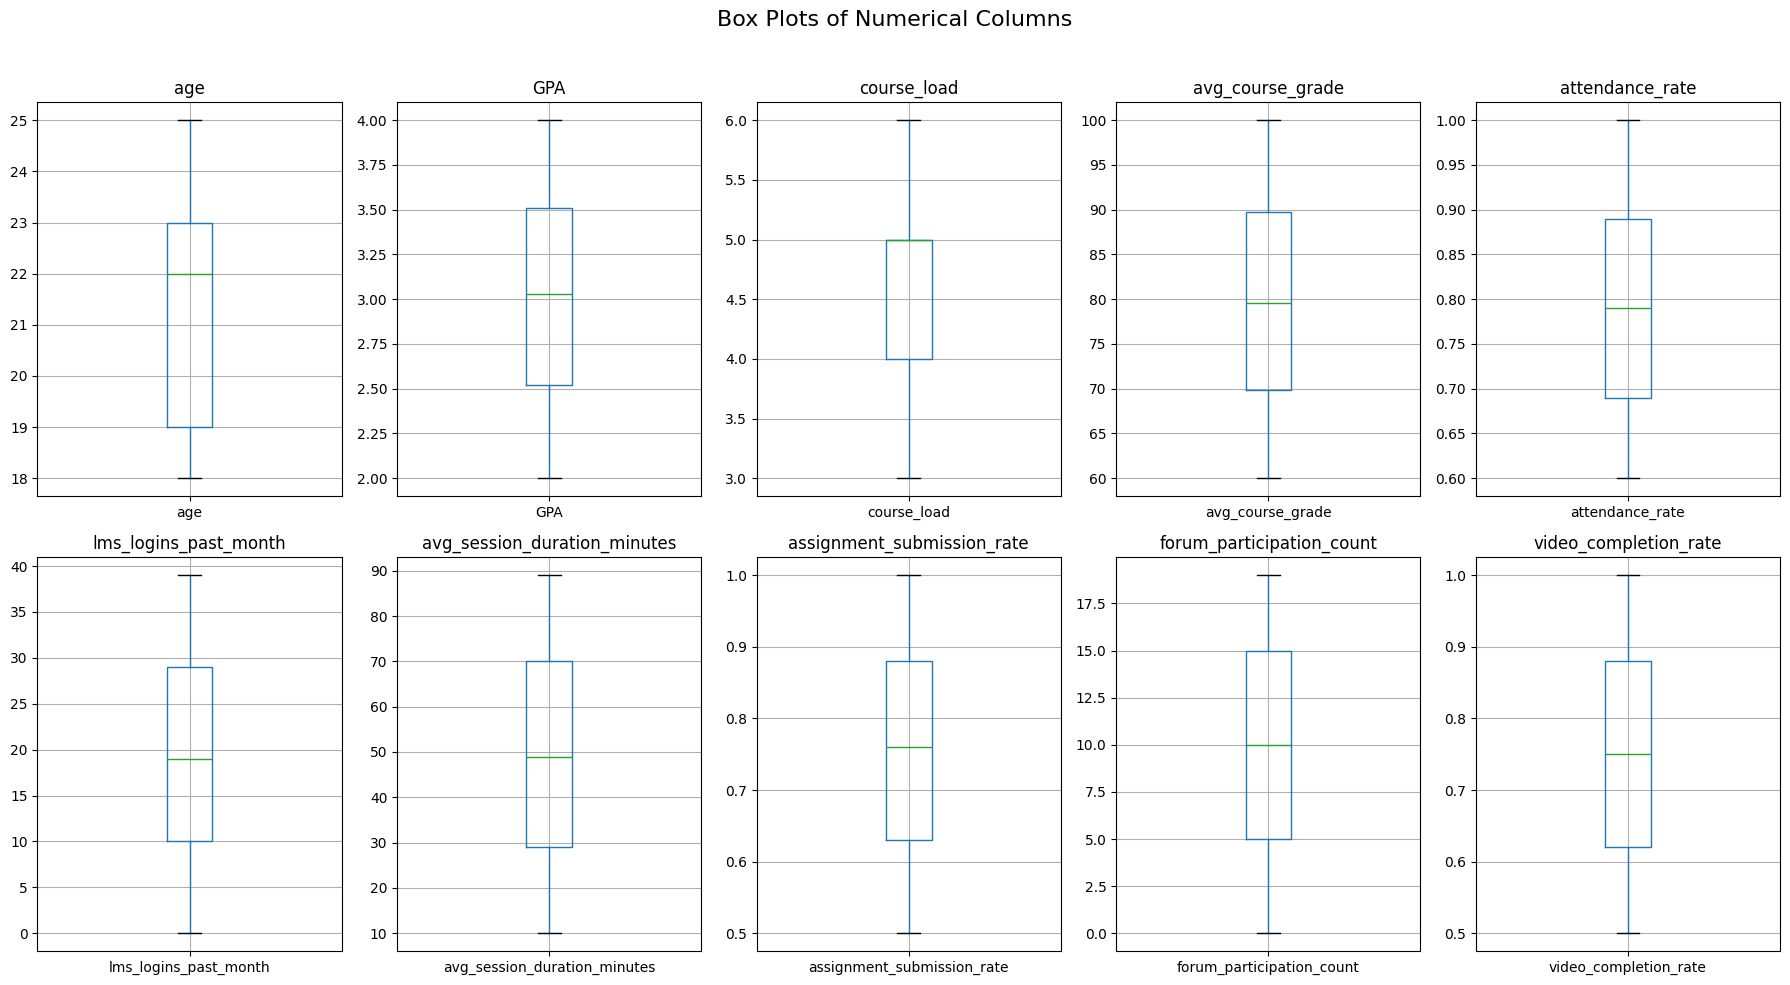

In [6]:
# Histograms for each numerical column
df[numerical_columns].hist(figsize=(18, 12), bins=20, layout=(2, 5))
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Box plots for each numerical column
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
for ax, col in zip(axes.flatten(), numerical_columns):
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)
plt.suptitle('Box Plots of Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

No se presentan outliers univariados en ninguna de las variables encontradas. Las variables tampoco parecen seguir una distribución estadística clara como la normal.

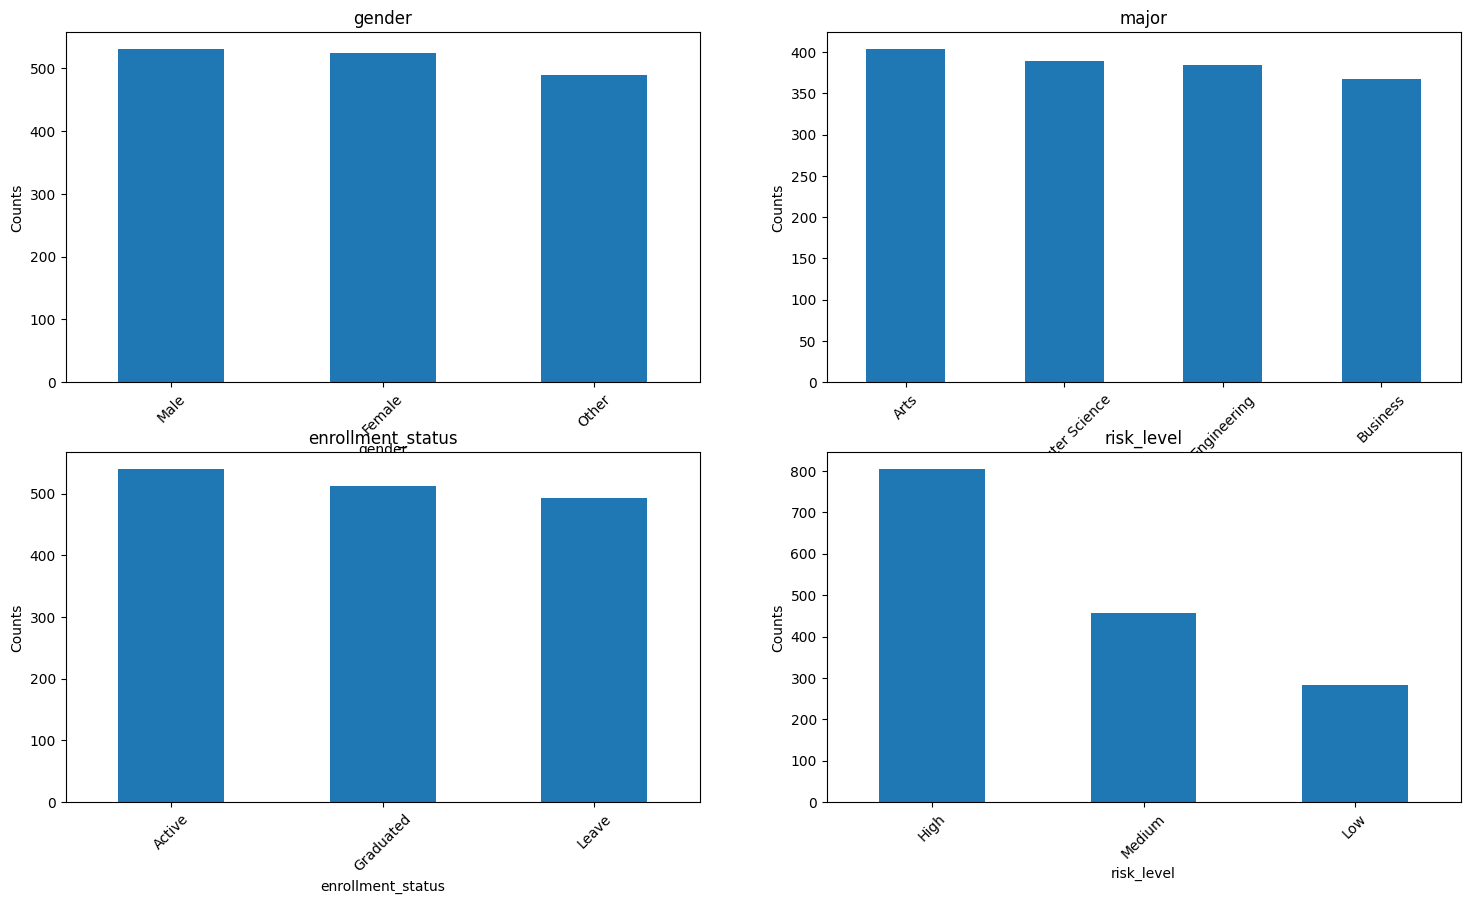

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
for ax, col in zip(axes.flatten(), categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(col)
    ax.set_ylabel('Counts')

La clase `risk_level` está claramente desbalanceada. Se usará creación de datos sintéticos para balancear las clases.

# Preprocesamiento
Se convertirá la variable objetivo a una numérica ordinal mediante LabelEncoder, y las demás variables predictoras serán transformadas mediante OneHotEncoder.

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

categorical_columns = categorical_columns.drop(['risk_level'])

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
le = LabelEncoder()

# Se elimina la columna 'risk_level' de X y se aplica OneHotEncoder a las demás columnas categóricas, manteniendo la estructura del dataframe.
X = df.copy().drop(columns=['risk_level'])
X.drop(columns=categorical_columns, inplace=True)
X = pd.concat([X, pd.DataFrame(ohe.fit_transform(df[categorical_columns]), columns=ohe.get_feature_names_out(categorical_columns))], axis=1)
X.head()

y = le.fit_transform(df['risk_level'])

In [9]:
display(pd.DataFrame(X).head())
display(y)

,age,GPA,course_load,avg_course_grade,attendance_rate,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,gender_Female,gender_Male,gender_Other,major_Arts,major_Business,major_Computer Science,major_Engineering,enrollment_status_Active,enrollment_status_Graduated,enrollment_status_Leave
0,24,2.42,5,67.2,0.71,32,33,0.70,8,0.74,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,21,3.73,6,64.4,0.84,29,53,0.91,13,0.85,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22,2.80,3,95.3,0.89,34,69,0.58,18,0.99,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,24,2.59,4,73.7,0.98,22,18,0.91,6,0.72,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20,2.30,4,87.4,0.95,9,11,0.77,15,0.76,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


array([0, 2, 2, ..., 1, 1, 0], shape=(1545,))

A continuación, a partir de X, se crearán dos versiones: Una normalizada y otra escalada.

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std = StandardScaler()
mm = MinMaxScaler()

X_std = X.copy()
X_std[numerical_columns] = std.fit_transform(X[numerical_columns])
X_mm = pd.DataFrame(mm.fit_transform(X), columns=X.columns)

In [11]:
display(X_std.head())
display(X_mm.head())

,age,GPA,course_load,avg_course_grade,attendance_rate,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,gender_Female,gender_Male,gender_Other,major_Arts,major_Business,major_Computer Science,major_Engineering,enrollment_status_Active,enrollment_status_Graduated,enrollment_status_Leave
0,1.094632,-1.036964,0.466950,-1.103254,-0.733764,1.099358,-0.705765,-0.361741,-0.285659,-0.075680,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.209976,1.256415,1.377857,-1.346207,0.395644,0.838744,0.156762,1.093521,0.583811,0.684027,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.224894,-0.371709,-1.354863,1.334946,0.830032,1.273101,0.846784,-1.193319,1.453281,1.650927,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.094632,-0.739350,-0.443957,-0.539258,1.611931,0.230645,-1.352660,1.093521,-0.633447,-0.213809,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.644845,-1.247044,-0.443957,0.649474,1.351298,-0.898683,-1.654544,0.123346,0.931599,0.062448,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


,age,GPA,course_load,avg_course_grade,attendance_rate,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,gender_Female,gender_Male,gender_Other,major_Arts,major_Business,major_Computer Science,major_Engineering,enrollment_status_Active,enrollment_status_Graduated,enrollment_status_Leave
0,0.857143,0.210,0.666667,0.1800,0.275,0.820513,0.291139,0.40,0.421053,0.48,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.428571,0.865,1.000000,0.1100,0.600,0.743590,0.544304,0.82,0.684211,0.70,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.571429,0.400,0.000000,0.8825,0.725,0.871795,0.746835,0.16,0.947368,0.98,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.857143,0.295,0.333333,0.3425,0.950,0.564103,0.101266,0.82,0.315789,0.44,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.285714,0.150,0.333333,0.6850,0.875,0.230769,0.012658,0.54,0.789474,0.52,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Sobre la detección de outliers multivariados

Este es un campo que aún no exploro, y la idea es aprender y probar metodologías.

De buenas a primeras se me ocurre que mediante técnicas de aprendizaje no supervisado como K-means se pueden encontrar outliers, donde estos se encontrarían a una distancia grande de los centroides. No obstante, también hay otros métodos de aprendizaje no supervisado, como DBSCAN, que es de clustering, o IsolationForest. 

**DBSCAN** consiste en identificar **grupos de puntos que estén muy cerca entre sí** (o regiones con alta densidad), marcando como ruido o outliers las regiones que están poco denamente pobladas, con el beneficio de que los datos **no tienen que estar linealmente separados**; ni siquiera que tengan una forma específica [ver imagen de ejemplo](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/DBSCAN-density-data.svg/1024px-DBSCAN-density-data.svg.png). En contraparte, asume que los grupos a encontrar tienen la misma cantidad de observaciones, y puede tener problemas al encontrar clusters con densidades diferentes, [para lo cual fue creado HDBSCAN](https://scikit-learn.org/stable/modules/clustering.html#hdbscan).

**Isolation Forest** es un algoritmo basado en árboles de decisión. Asumiendo que los **outliers son pocos y diferentes de la muestra**, se construyen múltiples **árboles seleccionando aleatoriamente una característica**, y eligiendo un umbral de acuerdo con el dominio de aplicación. El valor de corte sirve para dividir los datos y generar un mínimo y máximo, los cuales serán divididos recursivamente hasta (1.) **aislar cada instancia en una hoja del árbol**, o (2.) **alcanzar una profundidad máxima**. De esta manera, los outliers requerirán de menos hojas para quedar aislados, siendo esta la técnica para identificarlos.

---

En este ejercicio, me interesa evaluar el rendimiento de la creación de múltiples modelos empleando DBSCAN, IsolationForest, o sin aplicar ningún tipo de detección de outliers, con el fin de evaluar cómo se ve afectado el entrenamiento por estos datos. Para ello, se utilizarán múltiples *Pipelines* de Scikit-Learn, donde la configuración de los modelos de machine learning para realizar la clasificación serán comunes entre todos los pipelines, y lo que variará será el tratamiento de preprocesamiento dado a los datos.

In [13]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=2).fit(X_mm, y)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 145
Estimated number of noise points: 1201


Aparentemente, DBSCAN detecta todos los datos como ruido bajo estos ajustes. En una primera instancia, me sugiere que todos los datos están homogéneamente distribuidos, pero no tendría sentido, dado que implicaría que no hay forma de distinguir las clases entre sí. Otra interpretación es que la distancia promedio entre los puntos es mayor a 0.7, para lo cual un análisis mediante el método del codo puede ser revelador. Se usará KNN con $n = 5$ para graficar las distancias al 4to vecino, y elegir un valor de inflexión.

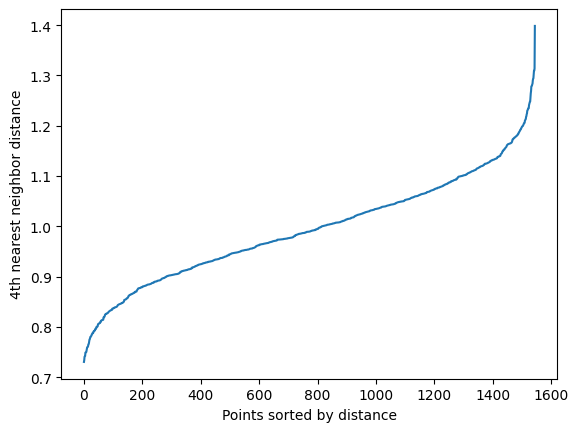

In [14]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X_mm)
dists, _ = neigh.kneighbors(X_mm)
k_dist = np.sort(dists[:, -1])  # distancia al 4.º vecino
plt.plot(k_dist)
plt.ylabel("4th nearest neighbor distance")
plt.xlabel("Points sorted by distance")
plt.show()

Los valores _adecuados_ estarían en el intervalo $\text{eps} \in [1.1, ~1.2]$, donde se produce el codo superior. Probando con la cota inferior:

In [17]:
dbscan = DBSCAN(eps=1.1, min_samples=5).fit(X_mm, y)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 36
Estimated number of noise points: 21


Y con la cota superior:

In [18]:
dbscan = DBSCAN(eps=1.2, min_samples=5).fit(X_mm, y)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 36
Estimated number of noise points: 1


En ningún caso la cantida de outliers es elevada, donde para la cota inferior el porcentaje de puntos ruidosos es menor al 1.4%.

Como parte de lo mencionado anteriormente, resulta interesante comparar estos resultados con IsolationForest. No obstante, no sé muy bien cómo hacer esto. Sin ajustar hiperparámetros todas las observaciones son categorizadas como outliers. Tampoco conozco de ninguna heurística o método para ajustar el parámetro `contamination`, así que lo único que se me ocurre es usar el porcentaje de outliers detectados en el paso anterior.

Dado el porcentaje de outliers detectado por DBSCAN a raíz del valor `eps` hallado de manera empírica por el método de KNN, tomo la decisión de no eliminarlos. Son un porcentaje bastante ínfimo que no considero que pueda ensuciar los modelos.

In [26]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.015, random_state=42)
iso_forest.fit(X_mm)
outliers = iso_forest.predict(X_mm)
outliers = np.where(outliers == -1, 1, 0)  # Convert -1 to 1 (outlier) and 1 to 0 (inlier)
# Count the number of outliers
n_outliers = np.sum(outliers)
print(f"Number of outliers detected: {n_outliers}")

Number of outliers detected: 24


# Balanceo de clases

Principalmente, `imbalanced-learning` implementa métodos métodos estadísticos y basados en machine learning. En este ejercicio, me interesa realizar over-sampling de las clases de la variable objetivo con menos observaciones (séase `medium` y `low`). De los métodos estadísticos destacan SMOTE y ADASYN, las cuales interpolan los datos ya existentes para generar nuevas muestras. 

# Selección de caraacterísticas

De nuevo, me basaré en las metodologías disponibles en scikit-learn. Como métodos univariados, se pueden seleccionar las K características con mejor puntaje, o aquellas características que superen un percentil de puntaje. Este función de puntaje se deja a elección, y para este notebook será `mutual_info_classif`. 

In [31]:
from sklearn.feature_selection import SelectKBest,  SelectPercentile,mutual_info_classif

kbest = SelectKBest(score_func=mutual_info_classif, k=7).fit(X_mm, y)
X_kbest = kbest.transform(X_mm)
print("Selected features based on mutual information:")
selected_features = X_kbest.shape[1]
print(f"Number of selected features: {selected_features}")
selected_feature_names = X.columns[kbest.get_support()]
print(f"Selected feature names: {selected_feature_names.tolist()}")

Selected features based on mutual information:
Number of selected features: 7
Selected feature names: ['GPA', 'attendance_rate', 'forum_participation_count', 'major_Arts', 'major_Business', 'major_Engineering', 'enrollment_status_Active']


In [30]:
top70 = SelectPercentile(score_func=mutual_info_classif, percentile=70).fit(X_mm, y)
X_top70 = top70.transform(X_mm)
print("Selected features based on 70th percentile of mutual information:")
selected_features_70 = X_top70.shape[1]
print(f"Number of selected features: {selected_features_70}")
selected_feature_names_70 = X.columns[top70.get_support()]
print(f"Selected feature names: {selected_feature_names_70.tolist()}")

Selected features based on 70th percentile of mutual information:
Number of selected features: 14
Selected feature names: ['age', 'GPA', 'course_load', 'avg_course_grade', 'attendance_rate', 'lms_logins_past_month', 'avg_session_duration_minutes', 'video_completion_rate', 'gender_Female', 'gender_Male', 'gender_Other', 'major_Business', 'major_Engineering', 'enrollment_status_Graduated']


Los resultados comparten algunas características en común. En todo caso, es posible explicar el dataset con menos variables de las originales, al menos desde una perspectiva univariada. Las perspectivas multivariadas, según he leído, se basan en análisis de rendimiento de modelos a medida de que se quitan características. Para entrenar modelos ya estoy yo, así que me quedaré con las top 7 variables y con eso entrenaré algunos modelos.

# Entrenamiento

Me gustan los modelos populares, así que iré con perceptron multicapas, máquinas de soporte vectorial, procesos gaussianos, y quizás alguno como bagging o boosting.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp_grid = [
    {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
        'activation': ['relu', 'tanh', 'logistic'],
        'alpha': np.linspace(0.0001, 0.01, 5),
        'learning_rate': ['constant', 'adaptative'],
        'solver': ['sgd'],
        'max_iter': [800]
    }
]

mlp_cv = GridSearchCV(MLPClassifier(random_state=42), mlp_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)
mlp_cv.fit(X_mm, y)

In [ ]:
display(f"Best estimator: {mlp_cv.best_estimator_}")
display(f"Best score: {mlp_cv.best_score_}")